In [1]:
import pandas as pd
import numpy as np

In [2]:
d=np.array(pd.read_excel('1.xlsx',header=None).transpose()[1][1:])

In [3]:
dcp=np.sum(d)/d.shape[0]
N=d.shape[0]
dcp

0.36899999999999994

In [5]:
sigd=np.sqrt(np.sum((d-dcp)**2)/(N-1))
sigd

np.float64(0.009944289260117542)

In [6]:
sig=sigd/np.sqrt(N)
sig

np.float64(0.0031446603773522042)

In [7]:
sig_p=np.round(np.sqrt(sig**2 + 0.01**2)+0.0001,3)

In [8]:
0.011/0.369*100

2.9810298102981028

In [50]:
V=np.zeros((3,12))
I=np.zeros((3,12))
R=np.zeros(3)
sistR=np.zeros(3)
sigR=np.zeros(3)
sigRp=np.zeros(3)
n=12
print('R   ','sist ','sigR ','sigRp')
for i in range(3):
    V[i]=np.array(pd.read_excel('data_R.xlsx',header=None)[2:][1+i*3])
    I[i]=np.array(pd.read_excel('data_R.xlsx',header=None)[2:][2+i*3])
    R[i]=np.round(np.sum(V[i]*I[i])/np.sum(I[i]*I[i]),3)
    sigR[i]=np.round(np.sqrt((np.sum(V[i]*V[i])/np.sum(I[i]*I[i])-R[i]**2)/(n-1)),3)
    sistR[i]=np.round(R[i]*np.sqrt((0.4/np.max(V[i]))**2 + ((0.002*np.max(I[i]) + 0.02)/np.max(I[i]))**2),3)
    sigRp[i]=np.round(np.sqrt(sigR[i]**2 + sistR[i]**2),3)
    print(R[i],sigR[i],sistR[i],sigRp[i], 0.4/np.max(V[i]), (0.002*np.max(I[i]) + 0.02)/np.max(I[i]))

R    sist  sigR  sigRp
4.988 0.014 0.011 0.018 0.0006756756756756757 0.0021685487948761165
2.982 0.021 0.007 0.022 0.0011627906976744186 0.002173460537727667
2.025 0.012 0.006 0.013 0.001724137931034483 0.002173837461973055


In [51]:
np.average(sigRp)/np.average(R)*100

np.float64(0.530265132566283)

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns

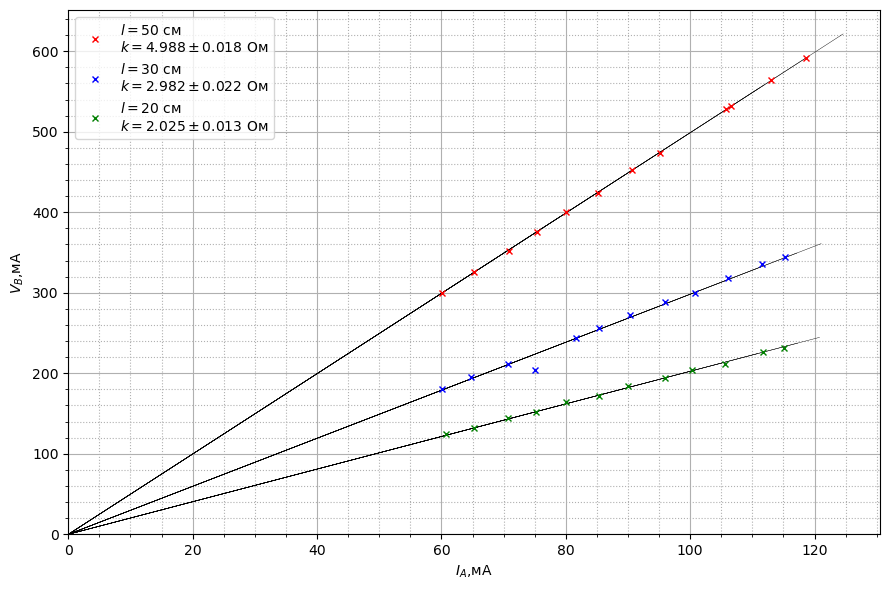

In [47]:
#sns.set()

fig,ax = plt.subplots(figsize=(9,6))

ax.set_xlim(0,np.max(I)*1.1)
ax.set_ylim(0,np.max(V)*1.1)
ax.set_xlabel("$I_A$,мА")
ax.set_ylabel("$V_B$,мА")
cl=['rx','bx','gx']
lb=['$l = 50$ см\n$k = 4.988\pm0.018$ Ом',\
    '$l = 30$ см\n$k = 2.982\pm0.022$ Ом',\
    '$l = 20$ см\n$k = 2.025\pm0.013$ Ом']
ax.minorticks_on()
for i in range(3):
    Il=np.linspace(0,I[i]*1.05,10)
    ax.plot(Il,R[i]*Il,'black',linewidth=0.3)
    ax.plot(I[i],V[i],cl[i],label=lb[i],markersize=5)
ax.legend()
plt.grid(which='major')
ax.grid(which='minor', linestyle=':')
fig.tight_layout()
fig.savefig('./imgs/graphic.png')

In [12]:
I[1]

array([111.57, 100.7 ,  90.31,  81.6 ,  70.7 ,  60.13,  64.82,  75.01,
        85.33,  95.9 , 106.01, 115.3 ])

In [25]:
l=np.array([0.5,0.3,0.2])
sigl=np.array([0.002,0.002,0.002])
d=np.array([0.369,0.369,0.369])/1000
sigd=np.array([0.011,0.011,0.011])/1000

In [26]:
R,d*d,l

(array([4.988, 2.982, 2.025]),
 array([1.36161e-07, 1.36161e-07, 1.36161e-07]),
 array([0.5, 0.3, 0.2]))

In [33]:
rho=R*(np.pi*d*d)/(4*l)
sigrho=rho*np.sqrt((sigl/l)**2+(sigRp/R)**2+(2*sigd/d)**2)

In [35]:
for i in range(3):
    print(rho[i]*10e5,sigrho[i]*10e5)

1.0668394188797667 0.0638647352467182
1.0629895573040178 0.06425144426497627
1.0827735681793942 0.0658254086117507


In [39]:
(2*sigd/d)/(sigrho/rho)

array([0.99594247, 0.98637582, 0.98070953])

In [43]:
np.average(rho),np.average(sigrho)*1e6

(np.float64(1.0708675147877263e-06), np.float64(0.0646471960411484))

In [44]:
np.average(sigrho)/np.average(rho)*100

np.float64(6.036899536910795)